<a href="https://colab.research.google.com/github/galenzo17/AI-personal-test/blob/main/Ragtextbased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, ingresa el texto que deseas analizar: Hola buenos días como estas que haces 


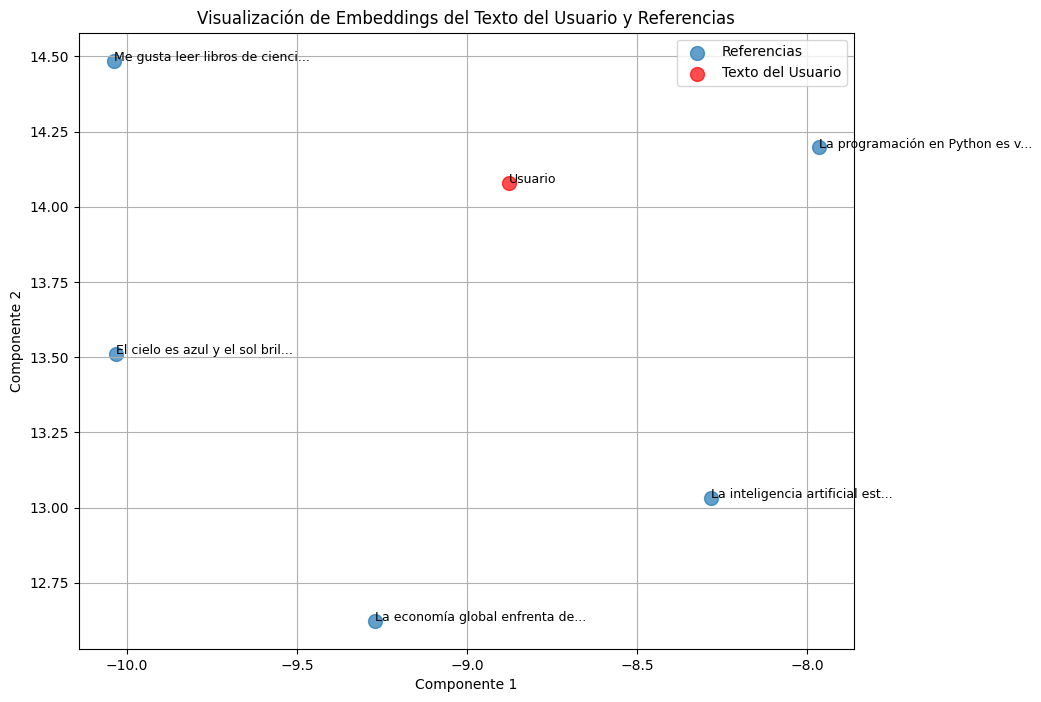

In [2]:
# Instalación de las bibliotecas necesarias
!pip install -q transformers umap-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt
import umap
from transformers import AutoTokenizer, AutoModel
import torch

# Cargar el modelo y el tokenizador de embeddings
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def generate_embedding(text):
    """Genera el embedding para un texto dado utilizando el modelo especificado."""
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).numpy()
    return embedding

# Solicitar al usuario que ingrese un texto
user_text = input("Por favor, ingresa el texto que deseas analizar: ")

# Generar el embedding para el texto del usuario
user_embedding = generate_embedding(user_text)

# Embeddings de referencia para comparación
reference_texts = [
    "El cielo es azul y el sol brilla.",
    "La programación en Python es versátil y poderosa.",
    "La inteligencia artificial está transformando el mundo.",
    "Me gusta leer libros de ciencia ficción.",
    "La economía global enfrenta desafíos significativos."
]
reference_embeddings = np.vstack([generate_embedding(text) for text in reference_texts])

# Combinar el embedding del usuario con los de referencia
all_embeddings = np.vstack([user_embedding, reference_embeddings])

# Reducir la dimensionalidad para visualización
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
embedding_2d = reducer.fit_transform(all_embeddings)

# Visualizar los embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[1:, 0], embedding_2d[1:, 1], s=100, alpha=0.7, label='Referencias')
plt.scatter(embedding_2d[0, 0], embedding_2d[0, 1], s=100, alpha=0.7, color='red', label='Texto del Usuario')
for i, text in enumerate(["Usuario"] + reference_texts):
    plt.text(embedding_2d[i, 0], embedding_2d[i, 1], text[:30] + ('...' if len(text) > 30 else ''), fontsize=9)
plt.title('Visualización de Embeddings del Texto del Usuario y Referencias')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Por favor, ingresa un texto para analizar: Hola buenos días como estas que haces mi amor sorry por acá todo bien gracias ya arregle con la mamá de un texto para que me escribieras 


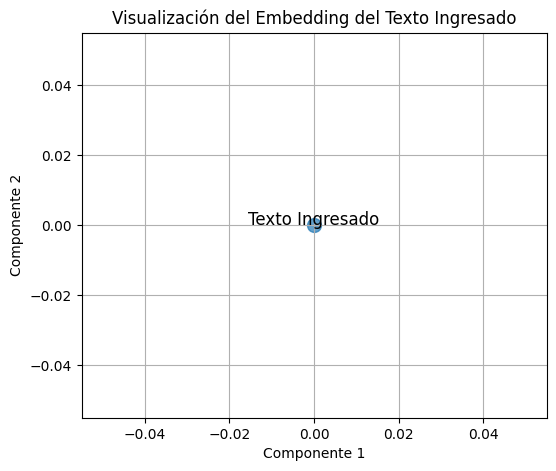

In [1]:
# Instalación de las bibliotecas necesarias
!pip install -q transformers umap-learn matplotlib

import torch
import numpy as np
import matplotlib.pyplot as plt
import umap
from transformers import AutoTokenizer, AutoModel

# Cargar el modelo y el tokenizador de embeddings
model_name = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def generate_embedding(text):
    """Genera un embedding para un texto utilizando el modelo especificado."""
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return embedding

# Solicitar al usuario que ingrese un texto
text_input = input("Por favor, ingresa un texto para analizar: ")

# Generar el embedding del texto ingresado
embedding = generate_embedding(text_input)

# Reducir la dimensionalidad para visualización
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='cosine')
embedding_2d = reducer.fit_transform(embedding.reshape(1, -1))

# Visualizar el embedding
plt.figure(figsize=(6, 5))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=100, alpha=0.7)
plt.text(embedding_2d[0, 0], embedding_2d[0, 1], 'Texto Ingresado', fontsize=12, ha='center')
plt.title('Visualización del Embedding del Texto Ingresado')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid(True)
plt.show()